# <span style="color: chocolate;">Ozempic</span>


## Objective
The primary  of this project is to delve into the effects of Ozempic on obese and hypertensive patients aged 40-75. A key focus is on addressing endogeneity to estimate the treatment effect accurately. Through exploratory data analysis, data merging, and the application of advanced statistical techniques, you will uncover causal relationships and provide insights into the dataset.

## Exploratory Data Analysis
- Conduct a thorough exploration of the provided datasets. This includes understanding the structure, identifying missing values, and summarizing key statistics. 
    - Numerical Columns
        - <span style="color: royalblue;">proc_units, rev_center_units, claim_charge</span>
    - Categorical Columns
        - <span style="color: royalblue;">journey_id, visit_id, state, zip, age, gender, place_of_service, vist_type, payor_channel, diag_1, diag_2, diag_3, diag_4, diag_5, proc_code</span>
    - Date Columns
        - <span style="color: royalblue;">claim_date</span>

- Generate visualizations to understand the distribution of important variables, relationships between different variables, and any other patterns or anomalies in the data such as peculiar patterns or outliers.

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
medical_data = pd.read_csv('Medical_claims.csv')
columns_to_keep = [
    'journey_id',
    'claim_date',
    'patient_short_zip',
    'patient_age',
    'patient_gender',
    'visit_type',
    'payor_channel',
    'diag_1',
    'diag_2',
    'diag_3',
    'diag_4',
    'diag_5',
    'proc_code'
]
medical_data = medical_data[columns_to_keep]

medical_data

,journey_id,claim_date,patient_short_zip,patient_age,patient_gender,visit_type,payor_channel,diag_1,diag_2,diag_3,diag_4,diag_5,proc_code
0,00006390c96ebfffed580074c35a16a7,7/13/20,922.0,55.0,M,home visit,managed medicaid,I872,NaN,NaN,NaN,NaN,A6549
1,00006390c96ebfffed580074c35a16a7,7/13/20,922.0,55.0,M,home visit,managed medicaid,I872,NaN,NaN,NaN,NaN,A6549
2,00006390c96ebfffed580074c35a16a7,7/19/23,922.0,60.0,M,outpatient visit,commercial,I5020,I480,I872,L03115,L03116,3074F
3,00006390c96ebfffed580074c35a16a7,7/19/23,922.0,60.0,M,outpatient visit,commercial,I5020,I480,I872,L03115,L03116,3078F
4,00006d564a4718c744f1bbf1b6c5f8c3,8/11/23,900.0,55.0,F,laboratory visit,commercial,N200,NaN,NaN,NaN,NaN,80053
...,...,...,...,...,...,...,...,...,...,...,...,...,...
623520,1fffbb8b7e6a6c38cf97dafe3c5bc1cc,1/4/23,922.0,50.0,M,outpatient visit,commercial,K2270,K2970,K219,K449,NaN,99213
623521,1fffbb8b7e6a6c38cf97dafe3c5bc1cc,5/21/19,922.0,45.0,M,outpatient visit,commercial,J321,Z6828,NaN,NaN,NaN,1159F
623522,1fffbb8b7e6a6c38cf97dafe3c5bc1cc,5/21/19,922.0,45.0,M,outpatient visit,commercial,J321,Z6828,NaN,NaN,NaN,3080F
623523,1fffbb8b7e6a6c38cf97dafe3c5bc1cc,5/21/19,922.0,45.0,M,outpatient visit,commercial,J321,Z6828,NaN,NaN,NaN,3077F


Filter out diag code
- E66	obesity
- Z68	body mass
- H35	hypertensive retinal
- I10-I16	hypertensive

- <span style="color: royalblue;">Mainly using E66 and I10 filter out obese and hyoertensive.</span>
- <span style="color: royalblue;">Use proc_code = J3490 and ndc to fitler out patient has taken the medication.</span>

In [19]:
diagnosis_columns = ['diag_1', 'diag_2', 'diag_3', 'diag_4', 'diag_5']

for column in diagnosis_columns:
    medical_data[column] = medical_data[column].astype(str).str[:3]


diag_code_to_check = ['E66', 'I10']
procedure_code_to_check = 'J3490'

filtered_data = medical_data[
    medical_data[diagnosis_columns].apply(lambda row: row.isin(diag_code_to_check).any(), axis=1) & 
    (medical_data['proc_code'] == procedure_code_to_check)
]
filtered_data

,journey_id,claim_date,patient_short_zip,patient_age,patient_gender,visit_type,payor_channel,diag_1,diag_2,diag_3,diag_4,diag_5,proc_code
1055,000f72e2fe46f4f45744f3a7f64894ce,6/2/23,921.0,40.0,F,outpatient visit,commercial,R51,E86,H04,H10,I10,J3490
1059,000f72e2fe46f4f45744f3a7f64894ce,3/31/23,921.0,40.0,F,outpatient visit,commercial,R42,E66,E86,F41,I10,J3490
2809,0025a407b584cee43753bd30c2aa5c1e,12/4/20,922.0,40.0,M,outpatient visit,commercial,S83,M94,I10,E66,M19,J3490
2885,00261b40936d4e0cf4c4de7b04fcf250,5/1/20,922.0,65.0,M,outpatient visit,medicare,C67,C67,N30,N32,I10,J3490
2892,00261b40936d4e0cf4c4de7b04fcf250,5/1/20,922.0,65.0,M,outpatient visit,medicare,C67,C67,N30,N32,I10,J3490
...,...,...,...,...,...,...,...,...,...,...,...,...,...
611453,1f6efd2a0ecd6e631ee8510eeebd9f8c,1/19/23,922.0,70.0,M,outpatient visit,commercial,D17,J45,I25,I10,Z79,J3490
617338,1fbb3f138cd93c0396d9def424ef8dae,7/24/23,922.0,70.0,F,outpatient visit,medicare,I10,E11,nan,nan,nan,J3490
621556,1fe8dd353c161c2cad372e18434f3517,3/23/22,911.0,65.0,F,outpatient visit,commercial,N60,E11,I10,I25,N60,J3490
621562,1fe8dd353c161c2cad372e18434f3517,3/3/22,911.0,65.0,F,outpatient visit,commercial,D05,N60,E11,I10,I25,J3490


<span style="color: royalblue;">Extract the journey_id from previous filter, apply this to the original dataset. Now we know all visit histories for patients who have taken the medication.</span>

In [20]:
# sort by journy_id and claim_date
unique_journey_ids = filtered_data['journey_id'].unique()
filtered_medical_data = medical_data[medical_data['journey_id'].isin(unique_journey_ids)]

filtered_medical_data = filtered_medical_data.sort_values(by=['journey_id', 'claim_date'])
filtered_medical_data

,journey_id,claim_date,patient_short_zip,patient_age,patient_gender,visit_type,payor_channel,diag_1,diag_2,diag_3,diag_4,diag_5,proc_code
1056,000f72e2fe46f4f45744f3a7f64894ce,2/24/23,921.0,40.0,F,outpatient visit,commercial,Z00,E55,E78,G43,R53,S1015
1057,000f72e2fe46f4f45744f3a7f64894ce,2/24/23,921.0,40.0,F,outpatient visit,commercial,Z00,E55,E78,G43,R53,J0725
1067,000f72e2fe46f4f45744f3a7f64894ce,2/24/23,921.0,40.0,F,outpatient visit,commercial,Z00,E55,E78,G43,R53,J7030
1070,000f72e2fe46f4f45744f3a7f64894ce,2/24/23,921.0,40.0,F,outpatient visit,commercial,Z00,E55,E78,G43,R53,J7050
1071,000f72e2fe46f4f45744f3a7f64894ce,2/24/23,921.0,40.0,F,outpatient visit,commercial,Z00,E55,E78,G43,R53,J2787
...,...,...,...,...,...,...,...,...,...,...,...,...,...
622774,1ff8ff0a9c69c0d70e83a2061727c792,9/23/22,912.0,50.0,F,outpatient visit,commercial,I10,N39,E11,M47,K76,96375
622780,1ff8ff0a9c69c0d70e83a2061727c792,9/23/22,912.0,50.0,F,outpatient visit,commercial,I10,N39,E11,M47,K76,J7030
622786,1ff8ff0a9c69c0d70e83a2061727c792,9/23/22,912.0,50.0,F,outpatient visit,commercial,I10,N39,E11,M47,K76,J0696
622803,1ff8ff0a9c69c0d70e83a2061727c792,9/23/22,912.0,50.0,F,outpatient visit,commercial,I10,N39,E11,M47,K76,81001


<span style="color: royalblue;">Visualizations</span>

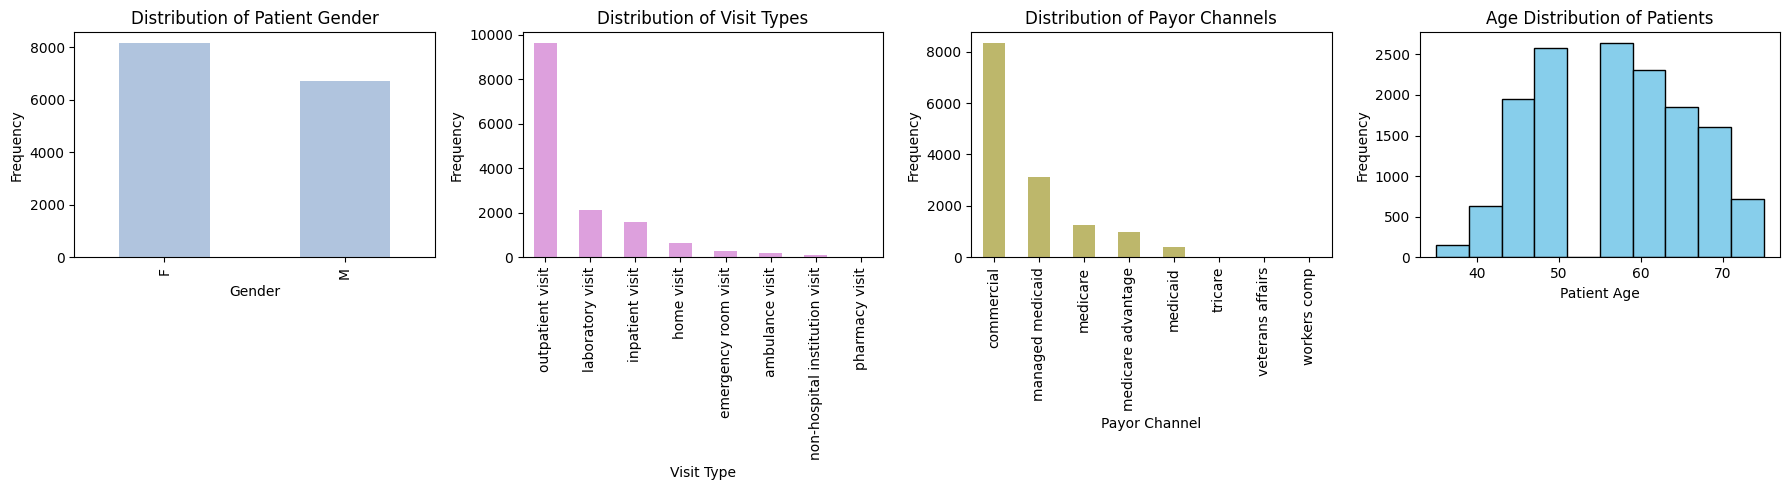

In [21]:
plt.figure(figsize=(18, 5)) 
plt.subplot(1, 4, 1)
filtered_medical_data['patient_gender'].value_counts().plot(kind='bar', color='lightsteelblue')
plt.title('Distribution of Patient Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')

plt.subplot(1, 4, 2)
filtered_medical_data['visit_type'].value_counts().plot(kind='bar', color='plum')
plt.title('Distribution of Visit Types')
plt.xlabel('Visit Type')
plt.ylabel('Frequency')

plt.subplot(1, 4, 3)
filtered_medical_data['payor_channel'].value_counts().plot(kind='bar', color='darkkhaki')
plt.title('Distribution of Payor Channels')
plt.xlabel('Payor Channel')
plt.ylabel('Frequency')


plt.subplot(1, 4, 4)
plt.hist(filtered_medical_data['patient_age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Patients')
plt.xlabel('Patient Age')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

<span style="color: royalblue;">Import second prescription csv file</span>

In [22]:
columns_to_use = ['journey_id', 'diagnosis_code', 'ndc']
prescription_data = pd.read_csv('/Users/kawehi/Desktop/MSBA/BAX 452/Class 5/Prescription.csv', usecols=columns_to_use)

prescription_data['diagnosis_code'] = prescription_data['diagnosis_code'].astype(str).str[:3]
prescription_data

,journey_id,diagnosis_code,ndc
0,00006390c96ebfffed580074c35a16a7,nan,47335067381
1,00006390c96ebfffed580074c35a16a7,nan,47335067381
2,00006390c96ebfffed580074c35a16a7,nan,47335067381
3,00006390c96ebfffed580074c35a16a7,nan,47335067381
4,00006390c96ebfffed580074c35a16a7,nan,65862059805
...,...,...,...
894618,1fff19f39322d5c25a60259f30d937a4,nan,310621030
894619,1fff19f39322d5c25a60259f30d937a4,nan,310621030
894620,1fff19f39322d5c25a60259f30d937a4,nan,310621030
894621,1fff19f39322d5c25a60259f30d937a4,nan,65862020299


<span style="color: royalblue;">Filter out diagnosis_code E66, I10.</span>

<span style="color: royalblue;">Filter out ndc code for ozempic.</span>
- <span style="color: royalblue;">ndc_to_check = [
    169413001, 169413013, 169413211, 169413212, 169413290, 169413297, 169413602, 169413611,
    169418103, 169418113, 169418190, 169418197, 169477211, 169477212, 169477290, 169477297]</span>


In [23]:
diagnosis_code_to_check = ['E66', 'I10']
ndc_to_check = [
    169413001, 169413013, 169413211, 169413212, 169413290, 169413297, 169413602, 169413611,
    169418103, 169418113, 169418190, 169418197, 169477211, 169477212, 169477290, 169477297]

#convert the relevant columns to string
prescription_data['diagnosis_code'] = prescription_data['diagnosis_code'].astype(str).str.strip()
prescription_data['ndc'] = prescription_data['ndc'].astype(str).str.strip()


#filter the data to keep rows that satisfy the conditions
filtered_prescription_data = prescription_data[
    (prescription_data['diagnosis_code'].isin(diagnosis_code_to_check)) &
    (prescription_data['ndc'].isin(ndc_to_check))
]

filtered_prescription_data

,journey_id,diagnosis_code,ndc


## Data Preprocessing and Merging
- Prepare the datasets for analysis by handling missing data, encoding categorical variables, and any other necessary preprocessing steps.
- Merge the Medical and Prescription datasets appropriately, ensuring a coherent structure for further analysis.


In [24]:
import numpy as np
merged_data = pd.merge(filtered_medical_data, prescription_data, on='journey_id', how='left')
merged_data.replace(['Non', 'nan', 'NaN'], np.nan, inplace=True)
merged_data_unique = merged_data.drop_duplicates()
merged_data

,journey_id,claim_date,patient_short_zip,patient_age,patient_gender,visit_type,payor_channel,diag_1,diag_2,diag_3,diag_4,diag_5,proc_code,diagnosis_code,ndc
0,000f72e2fe46f4f45744f3a7f64894ce,2/24/23,921.0,40.0,F,outpatient visit,commercial,Z00,E55,E78,G43,R53,S1015,NaN,NaN
1,000f72e2fe46f4f45744f3a7f64894ce,2/24/23,921.0,40.0,F,outpatient visit,commercial,Z00,E55,E78,G43,R53,J0725,NaN,NaN
2,000f72e2fe46f4f45744f3a7f64894ce,2/24/23,921.0,40.0,F,outpatient visit,commercial,Z00,E55,E78,G43,R53,J7030,NaN,NaN
3,000f72e2fe46f4f45744f3a7f64894ce,2/24/23,921.0,40.0,F,outpatient visit,commercial,Z00,E55,E78,G43,R53,J7050,NaN,NaN
4,000f72e2fe46f4f45744f3a7f64894ce,2/24/23,921.0,40.0,F,outpatient visit,commercial,Z00,E55,E78,G43,R53,J2787,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063353,1ff8ff0a9c69c0d70e83a2061727c792,9/23/22,912.0,50.0,F,outpatient visit,commercial,I10,N39,E11,M47,K76,85025,R53,69680011225
1063354,1ff8ff0a9c69c0d70e83a2061727c792,9/23/22,912.0,50.0,F,outpatient visit,commercial,I10,N39,E11,M47,K76,85025,E11,42423027101
1063355,1ff8ff0a9c69c0d70e83a2061727c792,9/23/22,912.0,50.0,F,outpatient visit,commercial,I10,N39,E11,M47,K76,85025,NaN,169413013
1063356,1ff8ff0a9c69c0d70e83a2061727c792,9/23/22,912.0,50.0,F,outpatient visit,commercial,I10,N39,E11,M47,K76,85025,NaN,116200116


## Causal Analysis Setup
- Discuss the potential endogeneity issues in estimating the treatment effect of Ozempic on the target population.
    - <span style="color: royalblue;">Selection Bias: Patients receiving Ozempic (treatment group) might differ systematically from those who do not (control group) in ways that also affect health outcomes. These differences could include severity of condition, overall health status, access to healthcare, and socioeconomic factors. If these factors are also correlated with the likelihood of repeated doctor visits, they could introduce endogeneity.</span>
    
    - <span style="color: plum;">Omitted variable bias: For instance, patients with more severe health conditions might be more likely to receive the medication and also have more frequent visits to the doctor, independent of the medication's effectiveness.</span>
    
    - <span style="color: darkseagreen;">Measurement Error: Repeated doctor visits do not precisely measure the true effectiveness, this misclassification could lead to biased estimates.</span>
    
- Outline your strategy for addressing endogeneity, referencing the big-picture problem of causality and treatment effect estimation discussed in class.
    - <span style="color: royalblue;">Double LASSO: It can help in mitigating the bias from omitted variable bias by selecting relevant control variables that are correlated with both the treatment and the outcome. The first LASSO can be used to select instruments or variables that predict treatment assignment, and the second LASSO to select variables that predict the outcome. This approach helps in reducing the model's dimensionality and focusing on the most relevant predictors, potentially addressing both selection bias and omitted variable bias.</span>
    
        - <span style="color: plum;">First Stage: Use LASSO to identify predictors of receiving Ozempic. This stage deals with selection bias by isolating factors that determine treatment assignment.</span>

        - <span style="color: darkseagreen;">Second Stage: Apply LASSO again, but this time to model the outcome given the treatment and other covariates identified in the first stage. This stage helps in adjusting for confounding factors that might affect the outcome, thus addressing omitted variable bias.</span>

<span style="color: royalblue;">To discover the casual effect(treatment effect), create two dummy varibales as X(treatment) and Y.</span>

<span style="color: royalblue;">X：Patients recevied the treatment(J3490)?</span>
- <span style="color: royalblue;">'is_after_medication' = 1 indicates the treatment</span>

<span style="color: royalblue;">Y: After taking the medication, if the treatment is effective.</span>
- <span style="color: royalblue;">We use repeated doctor visits as a proxy. If there are many visits after the treatment, it may indicates the treatment effect is not very useful.</span> 

<span style="color: royalblue;">After these, the next step is to run double LASSO to estimate the real treament effect of the treatment, excluding all other confounding factors.</span>

- <span style="color: royalblue;">Confounding Variables: 'patient_short_zip','patient_age','patient_gender','payor_channel'</span>

In [25]:
df = merged_data.sort_values(by=['journey_id', 'claim_date'])
df['is_after_medication'] = 0
df['unique_post_treatment_visits'] = 0

# Group by 'journey_id'
#First create the X variable, the whether they are before and after the treatment J3490.
for journey_id, group in df.groupby('journey_id'):
    # Check if 'J3490' is in 'proc_code' within this group
    if 'J3490' in group['proc_code'].values:
        # Find the first index where 'J3490' appears
        first_medication_index = group[group['proc_code'] == 'J3490'].index.min()
        # Set the dummy variable to 1 for all rows after the first 'J3490' treatment
        df.loc[(df['journey_id'] == journey_id) & (df.index > first_medication_index), 'is_after_medication'] = 1
#Then count the unique dates as the repeated visits to doctor, since one visit can has many treatment and generates many records.
    treatment_dates = group[group['proc_code'] == 'J3490']['claim_date']
        
    if not treatment_dates.empty:
        #the first treatment date
        first_treatment_date = treatment_dates.min()
            
        #count unique visit dates after the first treatment date
        unique_post_treatment_dates = group[group['claim_date'] > first_treatment_date]['claim_date'].nunique()
            
        #assign the count to all rows for this patient
        df.loc[group.index, 'unique_post_treatment_visits'] = unique_post_treatment_dates

df

,journey_id,claim_date,patient_short_zip,patient_age,patient_gender,visit_type,payor_channel,diag_1,diag_2,diag_3,diag_4,diag_5,proc_code,diagnosis_code,ndc,is_after_medication,unique_post_treatment_visits
0,000f72e2fe46f4f45744f3a7f64894ce,2/24/23,921.0,40.0,F,outpatient visit,commercial,Z00,E55,E78,G43,R53,S1015,NaN,NaN,0,4
1,000f72e2fe46f4f45744f3a7f64894ce,2/24/23,921.0,40.0,F,outpatient visit,commercial,Z00,E55,E78,G43,R53,J0725,NaN,NaN,0,4
2,000f72e2fe46f4f45744f3a7f64894ce,2/24/23,921.0,40.0,F,outpatient visit,commercial,Z00,E55,E78,G43,R53,J7030,NaN,NaN,0,4
3,000f72e2fe46f4f45744f3a7f64894ce,2/24/23,921.0,40.0,F,outpatient visit,commercial,Z00,E55,E78,G43,R53,J7050,NaN,NaN,0,4
4,000f72e2fe46f4f45744f3a7f64894ce,2/24/23,921.0,40.0,F,outpatient visit,commercial,Z00,E55,E78,G43,R53,J2787,NaN,NaN,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063353,1ff8ff0a9c69c0d70e83a2061727c792,9/23/22,912.0,50.0,F,outpatient visit,commercial,I10,N39,E11,M47,K76,85025,R53,69680011225,1,0
1063354,1ff8ff0a9c69c0d70e83a2061727c792,9/23/22,912.0,50.0,F,outpatient visit,commercial,I10,N39,E11,M47,K76,85025,E11,42423027101,1,0
1063355,1ff8ff0a9c69c0d70e83a2061727c792,9/23/22,912.0,50.0,F,outpatient visit,commercial,I10,N39,E11,M47,K76,85025,NaN,169413013,1,0
1063356,1ff8ff0a9c69c0d70e83a2061727c792,9/23/22,912.0,50.0,F,outpatient visit,commercial,I10,N39,E11,M47,K76,85025,NaN,116200116,1,0


## Model Development: Double-Lasso / Treatment Effect Lasso
- Implement the double-lasso technique to estimate the treatment effect of Ozempic,considering the endogeneity of treatment assignment.
- Justify the inclusion of variables in your model, explaining the rationale behind each decision.

<span style="color: royalblue;">First stage of Double Lasso</span>
- <span style="color: royalblue;">Predict the Treatment on the all other Xs</span>

In [26]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC

#Double Lasso, first Stage
#Predict the Treatment on the all other Xs

#Computor RaM was dead when I select diag_ into X and encode then run Lasso on them. So exclude them.
X = df[['patient_short_zip','patient_age','patient_gender','payor_channel']]
Y = df['is_after_medication']

categorical_columns = X.select_dtypes(include=['object', 'category']).columns.tolist()
# Exclude target and other non-feature columns
#categorical_columns = [col for col in categorical_columns if col not in ['is_after_medication', 'unique_post_treatment_visits']]

df_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True)
X_encoded = df_encoded
X_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1063358 entries, 0 to 1063357
Data columns (total 10 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   patient_short_zip                 1063358 non-null  float64
 1   patient_age                       1023115 non-null  float64
 2   patient_gender_M                  1063358 non-null  bool   
 3   payor_channel_managed medicaid    1063358 non-null  bool   
 4   payor_channel_medicaid            1063358 non-null  bool   
 5   payor_channel_medicare            1063358 non-null  bool   
 6   payor_channel_medicare advantage  1063358 non-null  bool   
 7   payor_channel_tricare             1063358 non-null  bool   
 8   payor_channel_veterans affairs    1063358 non-null  bool   
 9   payor_channel_workers comp        1063358 non-null  bool   
dtypes: bool(8), float64(2)
memory usage: 24.3 MB


In [27]:
#There are some Nas in the patient_age, assign median number to them
median_age = df_encoded['patient_age'].median()
df_encoded['patient_age'].fillna(median_age, inplace=True)

In [28]:
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC

#run Lasso for them
lasso_cv = LassoCV(alphas=None, cv=5, random_state=0)
lasso_cv.fit(X_encoded, Y)
#Predicted treatment effect(the part correlated to the other Xs in Treatment)
Y_pred = lasso_cv.predict(X_encoded)

#calculate the residuals
residuals = Y - Y_pred
print(Y_pred)

[0.85917439 0.85917439 0.85917439 ... 0.75718271 0.75718271 0.75718271]


<span style="color: royalblue;">The second stage of Double Lasso</span>
- <span style="color: royalblue;">Including the predicted treatment variable in the lasso regression, while still keep the residuals from stage 1.</span>

In [29]:

#code from Jake
class SelectiveRegularizationLinearRegression:
    def __init__(self, alpha, apply_penalty, tolerance=1e-4, max_iterations=1000):
        self.alpha = alpha
        self.tolerance = tolerance
        self.apply_penalty = apply_penalty
        self.max_iterations = max_iterations
        self.w = None
        
    def _predicted_values(self, X, w):
        return np.matmul(X, w)

    def _rho_compute(self, y, X, w, j):
        X_k = np.delete(X, j, 1)
        w_k = np.delete(w, j)
        predict_k = self._predicted_values(X_k, w_k)
        residual = y - predict_k
        rho_j = np.sum(X[:, j] * residual)
        return rho_j

    def _z_compute(self, X):
        return np.sum(X * X, axis=0)
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        if not self.w:
            self.w = np.zeros(n_features)
        z = self._z_compute(X)
        for iteration in range(self.max_iterations):
            max_step = 0
            for j in range(n_features):
                rho_j = self._rho_compute(y, X, self.w, j)
                w_j_old = self.w[j]
                if j == 0:
                    self.w[j] = rho_j / z[j]
                else:
                    if self.apply_penalty[j]:
                        if rho_j < -self.alpha * n_samples:
                            self.w[j] = (rho_j + self.alpha * n_samples) / z[j]
                        elif -self.alpha * n_samples <= rho_j <= self.alpha * n_samples:
                            self.w[j] = 0.
                        elif rho_j > self.alpha * n_samples:
                            self.w[j] = (rho_j - self.alpha * n_samples) / z[j]
                    else:
                        self.w[j] = rho_j / z[j]
                max_step = max(max_step, abs(self.w[j] - w_j_old))
            if max_step < self.tolerance:
                break
        return self

    def predict(self, X):
        if self.w is None:
            raise ValueError("Model is not fitted yet!")
        return self._predicted_values(X, self.w)

In [30]:
#add the constant(intercept term to the X, and merge the X. The residuals(real treatment) is the last term.
n_samples = len(X_encoded)
X = np.hstack((np.ones((n_samples, 1)), X_encoded))
#The endogenous part of the treatment variable
X = np.hstack((X, df['is_after_medication'].values.reshape(-1, 1)))
#This is the treatment
X = np.hstack((X,residuals.values.reshape(-1,1)))
print(X)
print(X.shape[1])

[[1.0 921.0 40.0 ... False 0 -0.8591743930021902]
 [1.0 921.0 40.0 ... False 0 -0.8591743930021902]
 [1.0 921.0 40.0 ... False 0 -0.8591743930021902]
 ...
 [1.0 912.0 50.0 ... False 1 0.24281728950271386]
 [1.0 912.0 50.0 ... False 1 0.24281728950271386]
 [1.0 912.0 50.0 ... False 1 0.24281728950271386]]
13


In [31]:
#only apply penalty to Xs besides the predicted treatment and the real treatment
Y = df['unique_post_treatment_visits'].values
apply_penalty = np.array([False,True, True, True, True, True, True, True, True, True, True,True,False,False]) #apply a penalty term to the last 2 coefficients
alpha = 0.1 # L1 penalty term

#max_iterations = 1000 # Optional, determines how long the model will look for an l1 penalty
model = SelectiveRegularizationLinearRegression(alpha, apply_penalty)
model.fit(X, Y)

In [32]:
print("coefficients:", model.w) # print out model coefficients
#The treatment effect is the last term
print(f'The treatment effect is: {model.w[-1]}')

coefficients: [ 1.02210380e+02  1.98462204e-03 -1.95144634e+00 -1.83731864e+01
  1.05767024e+01  1.78956129e+01  1.52261258e+01  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  9.89246886e+01
 -6.07574840e+01]
The treatment effect is: -60.757483966253226


## Model Evaluation and Interpretation 
- Evaluate the performance of your model, discussing the implications of your findings.
- Interpret the estimated treatment effects, providing insights into the impact of Ozempic on the target patient population.

<span style="color: royalblue;">Evaluating the Model's Performance</span>

- The model incorporates various original variables from X_encoded, including patient demographic and geographic information. The positive correlation between zip code number and patient repeated visit rates highlights the geographic disparities in healthcare outcomes or access, suggesting that patients from higher zip code areas may experience different healthcare service levels. This finding could indicate underlying socioeconomic or healthcare resource distribution factors for further investigation.

- The negative relationship between patient age and the rate of repeat visits suggests that younger patients are more likely to have repeated visits. This could reflect differences in health status, healthcare needs, or even healthcare-seeking behavior across different age groups.

- Model's performance is its ability to address endogeneity, particularly concerning the treatment variable is_after_treament. The high positive coefficient initially suggested for this variable indicated a risk of misinterpreting the treatment effect. However, by isolating the endogenous confounding component and focusing on the true exogenous treatment effect, the model enhances the reliability of the causal inference drawn from the data.

<span style="color: royalblue;">Implications of Findings</span>

- The estimated exogenous treatment effect of Ozempic -60.757. This negative coefficient implies that the treatment with Ozempic is associated with a reduction in the number of unique post-treatment repeated visits. The effect size suggests that while Ozempic has a beneficial impact on reducing the necessity for additional healthcare interventions post-treatment, the magnitude of this impact is more moderate.

- This result is important in the context of treating chronic conditions where reducing the frequency of doctor visits can significantly impact patient quality of life and healthcare system resource allocation. The treatment effect of Ozempic, as estimated by the model, provides valuable evidence of its effectiveness in the target patient population.


<span style="color: royalblue;">Interpretation of Estimated Treatment Effects</span>

- The negative effect of Ozempic on the number of post-treatment repeated visits can be interpreted as an indicator of treatment success. By significantly reducing the need for follow-up visits, Ozempic not only potentially improves patient health outcomes but also suggests a positive impact on the efficiency of healthcare resource use. This finding supports the clinical value of Ozempic in managing patients' conditions, aligning with the broader goal of enhancing patient care through effective treatment options.

In [35]:
X_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1063358 entries, 0 to 1063357
Data columns (total 10 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   patient_short_zip                 1063358 non-null  float64
 1   patient_age                       1063358 non-null  float64
 2   patient_gender_M                  1063358 non-null  bool   
 3   payor_channel_managed medicaid    1063358 non-null  bool   
 4   payor_channel_medicaid            1063358 non-null  bool   
 5   payor_channel_medicare            1063358 non-null  bool   
 6   payor_channel_medicare advantage  1063358 non-null  bool   
 7   payor_channel_tricare             1063358 non-null  bool   
 8   payor_channel_veterans affairs    1063358 non-null  bool   
 9   payor_channel_workers comp        1063358 non-null  bool   
dtypes: bool(8), float64(2)
memory usage: 24.3 MB


## Additional Insights
- Utilize the census and additional Ozempic information to enrich your analysis. This could involve integrating demographic factors from selected zip code prefixes to explore how they might influence treatment effects or reveal interesting patterns related to the use of Ozempic.
- If you prefer, you can incorporate these additional insights into your EDA section. Whether included in the EDA or as a separate section, the allocation of points will not be affected.
- Flexibility in Approach: This assignment is designed to encourage creative and critical thinking. You are free to explore the datasets from various angles and use any methods, functions, or packages you find appropriate for your analysis. The emphasis is on the quality of insights generated and the justification of your analytical choices, rather than adherence to a prescribed set of tools or techniques.

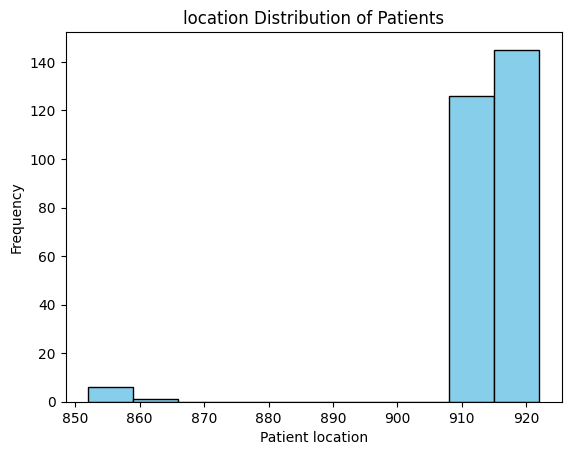

In [36]:
plt.hist(filtered_data['patient_short_zip'], bins=10, color='skyblue', edgecolor='black')

plt.xlabel('Patient location')
plt.ylabel('Frequency')
plt.title('location Distribution of Patients')

plt.show()

<span style="color: royalblue;">Implications of Findings</span>
<span style="color: royalblue;">This plot is about histogram of the patients'location with E66/I10 and Ozempic Treatment</span>

<span style="color: royalblue;">There are 4 observebal high rate regions:</span>
- <span style="color: royalblue;">920: San Diego, CA</span>
- <span style="color: royalblue;">910: Pasadena, CA (in the Los Angles County)</span>
- <span style="color: royalblue;">850: Phoenix, AZ</span>
- <span style="color: royalblue;">860: Flagstaff, AZ</span>

<span style="color: royalblue;">In 2018, 30.7% of U.S. adults are overweight, according to NIH from U.S. Department of Health and Human Services.</span>

<span style="color: royalblue;">In 2022, the percentage of the adult population (age 18 and older) that reports a body mass index (BMI) greater than or equal to 30 kg/m2 (age-adjusted) was 24.1% in San Diego County, CA. This number is growing in recent years, while the 92.5% of the population of San Diego County, 92.4% in Pasadena City，85.5% in Phoenix, 89.1% in flagstaff has health coverage,has health coverage. In the same time, these areas also have low poverty rate around 15%. This may be why there are so many cases from San Diego in this case, as these geographic areas have well-functioning healthcare systems and people have the access and ability to rely on insurance for medical treatment.</span>